# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:

import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The trends of the participation rate with respect to the average scores for both the ACT and SAT are observed to be inversely proportionate to each other, where a higher participation rate translates into a lower average score for that particular state.

#### 4a. Does the data look complete? 

Answer: <b> No </b>

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: <b> SAT - Min 400, Max 1600 </b><br>
        <b> ACT - Min 1, Max 36 </b>

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
sat_2017.loc[sat_2017['State']=='Maryland',['Math']] = 526
act_2017.loc[act_2017['State']=='Maryland',['Science']] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [6]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [7]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: <b> Participation for both tables is supposed to be a float data type for both tables but pandas read it as an object because of the % sign and also in the ACT 2017 table, Composite is supposed to be a float data type but it is an object. </b>

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [8]:
def conversion(column):
    return column.map(lambda x : float(x.strip('%'))) 

In [9]:
def remove_letters(column):
    return column.map(lambda x : float(re.sub('[^\d\.]','',x)))

- Fix any individual values preventing other columns from being the appropriate type.

In [10]:
sat_2017['Participation'] = conversion(sat_2017['Participation'])
act_2017['Participation'] = conversion(act_2017['Participation'])
act_2017['Composite'] = remove_letters(act_2017['Composite'])

- Finish your data modifications by making sure the columns are now typed appropriately.

In [11]:
sat_2017.head(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116


In [12]:
act_2017.head(3)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8


- Display the data types again to confirm they are correct.

In [13]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [14]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [15]:
sat_2017.columns = [x.lower() for x in sat_2017.columns]
act_2017.columns = [x.lower() for x in act_2017.columns]
sat_2017.rename(columns={'participation': 'sat_part_2017',
                         'evidence-based reading and writing': 'sat_evidence_based_reading_and_writing_2017',
                         'math': 'sat_math_2017', 
                         'total': 'sat_total_2017'}, inplace=True)
act_2017.rename(columns={'participation': 'act_part_2017',
                         'english': 'act_english_2017',
                         'math': 'act_math_2017', 
                         'reading': 'act_reading_2017',
                         'science': 'act_science_2017',
                         'composite': 'act_composite_2017'}, inplace=True)

In [16]:
sat_2017.head(3)

,state,sat_part_2017,sat_evidence_based_reading_and_writing_2017,sat_math_2017,sat_total_2017
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116


In [17]:
act_2017.head(3)

,state,act_part_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|States that are found in the U.S.| 
|sat_part_2017|float|SAT|% of state population who took part in 2017's SAT|
|sat_evidence_based_reading_and_writing_2017|float|SAT|Average score of participants for that state in this category for 2017's SAT|
|sat_math_2017|float|SAT|Average score of participants for that state in this category for 2017's SAT|
|sat_total_2017|float|SAT|Average TOTAL score of participants for that state for 2017's SAT|
|act_part_2017|float|ACT|% of state population who took part in 2017's ACT|
|act_english_2017|float|ACT|Average score of participants for that state in this category for 2017's ACT|
|act_math_2017|float|ACT|Average score of participants for that state in this category for 2017's ACT|
|act_reading_2017|float|ACT|Average score of participants for that state in this category for 2017's ACT|
|act_science_2017|float|ACT|Average score of participants for that state in this category for 2017's ACT|
|act_composite_2017|float|ACT|Average COMPOSITE score of participants for that state in this category for 2017's ACT|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [18]:
act_2017 = act_2017[act_2017.state != 'National']
act_2017.head()

,state,act_part_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [19]:
combined_2017 = pd.merge(sat_2017,act_2017, on='state')
combined_2017.head()

,state,sat_part_2017,sat_evidence_based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_part_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [20]:
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [21]:
# Using pandas to read the 2018 csv files
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [22]:
# Display first 3 row of DataFrames to check
sat_2018.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [23]:
act_2018.head(10)

,State,Participation,Composite,English,Math,Reading,Science
0,Alabama,100%,19.1,18.9,18.3,19.6,19.0
1,Alaska,33%,20.8,19.8,20.6,21.6,20.7
2,Arizona,66%,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100%,19.4,19.1,18.9,19.7,19.4
4,California,27%,22.7,22.5,22.5,23.0,22.1
5,Colorado,30%,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26%,25.6,26.0,24.8,26.1,24.9
7,Delaware,17%,23.2,23.7,23.1,24.5,23.4
8,District of columbia,32%,23.6,23.7,22.7,24.4,23.0
9,Florida,66%,19.9,19.2,19.3,21.1,19.5


In [24]:
# Removing % sign from Participation column and changing data type into float using previous function
sat_2018['Participation'] = conversion(sat_2018['Participation'])
act_2018['Participation'] = conversion(act_2018['Participation'])

In [25]:
# Display first 3 row after conversion to check
sat_2018.head(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149


In [26]:
act_2018.head(10)

,State,Participation,Composite,English,Math,Reading,Science
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
4,California,27.0,22.7,22.5,22.5,23.0,22.1
5,Colorado,30.0,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26.0,25.6,26.0,24.8,26.1,24.9
7,Delaware,17.0,23.2,23.7,23.1,24.5,23.4
8,District of columbia,32.0,23.6,23.7,22.7,24.4,23.0
9,Florida,66.0,19.9,19.2,19.3,21.1,19.5


In [27]:
# Renaming columns into appropriate unique names for future data manipulation
sat_2018.columns = [x.lower() for x in sat_2018.columns]
act_2018.columns = [x.lower() for x in act_2018.columns]
sat_2018.rename(columns={'participation': 'sat_part_2018',
                         'evidence-based reading and writing': 'sat_evidence_based_reading_and_writing_2018',
                         'math': 'sat_math_2018', 
                         'total': 'sat_total_2018'}, inplace=True)
act_2018.rename(columns={'participation': 'act_part_2018',
                         'english': 'act_english_2018',
                         'math': 'act_math_2018', 
                         'reading': 'act_reading_2018',
                         'science': 'act_science_2018',
                         'composite': 'act_composite_2018'}, inplace=True)

In [28]:
# Display first 3 row after conversion to check
sat_2018.head(3)

,state,sat_part_2018,sat_evidence_based_reading_and_writing_2018,sat_math_2018,sat_total_2018
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149


In [29]:
act_2018.head(10)

,state,act_part_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
4,California,27.0,22.7,22.5,22.5,23.0,22.1
5,Colorado,30.0,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26.0,25.6,26.0,24.8,26.1,24.9
7,Delaware,17.0,23.2,23.7,23.1,24.5,23.4
8,District of columbia,32.0,23.6,23.7,22.7,24.4,23.0
9,Florida,66.0,19.9,19.2,19.3,21.1,19.5


In [30]:
# To rename one of the rows in ACT 2018 to be same as SAT 2018 so that no data will be lost during merging

act_2018.replace('District of columbia','District of Columbia',inplace=True)
act_2018.head(10)

,state,act_part_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
4,California,27.0,22.7,22.5,22.5,23.0,22.1
5,Colorado,30.0,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26.0,25.6,26.0,24.8,26.1,24.9
7,Delaware,17.0,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32.0,23.6,23.7,22.7,24.4,23.0
9,Florida,66.0,19.9,19.2,19.3,21.1,19.5


<center><b> Data Dictionary for 2018 datasets </b>

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|States that are found in the U.S.| 
|sat_part_2018|float|SAT|% of state population who took part in 2018's SAT|
|sat_evidence_based_reading_and_writing_2018|float|SAT|Average score of participants for that state in this category for 2018's SAT|
|sat_math_2018|float|SAT|Average score of participants for that state in this category for 2018's SAT|
|sat_total_2018|float|SAT|Average TOTAL score of participants for that state for 2018's SAT|
|act_part_2018|float|ACT|% of state population who took part in 2018's ACT|
|act_english_2018|float|ACT|Average score of participants for that state in this category for 2018's ACT|
|act_math_2018|float|ACT|Average score of participants for that state in this category for 2018's ACT|
|act_reading_2018|float|ACT|Average score of participants for that state in this category for 2018's ACT|
|act_science_2018|float|ACT|Average score of participants for that state in this category for 2018's ACT|
|act_composite_2018|float|ACT|Average COMPOSITE score of participants for that state in this category for 2018's ACT|

In [31]:
# Joining both tables and displaying first 3 rows of merged table 
combined_2018 = pd.merge(sat_2018,act_2018, on='state')
combined_2018.head()

,state,sat_part_2018,sat_evidence_based_reading_and_writing_2018,sat_math_2018,sat_total_2018,act_part_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,19.4
4,California,60.0,540,536,1076,27.0,22.7,22.5,22.5,23.0,22.1


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [32]:
final = pd.merge(combined_2017,combined_2018, on='state')
final.head()

,state,sat_part_2017,sat_evidence_based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_part_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_part_2018,sat_evidence_based_reading_and_writing_2018,sat_math_2018,sat_total_2018,act_part_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,...,60.0,540,536,1076,27.0,22.7,22.5,22.5,23.0,22.1


In [33]:
final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [34]:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sat_part_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_evidence_based_reading_and_writing_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.921569,47.094307,468.0,523.50,548.0,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_part_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [35]:
def calculate_std(data):
    
    mean = data.sum() / data.count()
    x = 1 / data.count()
    y = ((data - mean)**2).sum()
    std = np.sqrt((x*y))
    
    return std    

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [36]:
sd = {i:calculate_std(final[i]) for i in final.columns if i != 'state'}
sd

{'sat_part_2017': 34.929070766645076,
 'sat_evidence_based_reading_and_writing_2017': 45.21697020437866,
 'sat_math_2017': 46.63031208755251,
 'sat_total_2017': 91.58351056778743,
 'act_part_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363368,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.046902931484265,
 'act_science_2017': 1.7222161451443672,
 'act_composite_2017': 2.0007860815819893,
 'sat_part_2018': 36.946619223539415,
 'sat_evidence_based_reading_and_writing_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378353,
 'sat_total_2018': 93.22742384464432,
 'act_part_2018': 33.70173582041031,
 'act_composite_2018': 2.0855261815801143,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.0157072555557174,
 'act_reading_2018': 2.1458918845104216,
 'act_science_2018': 1.8516885484833538}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:<b> No. Numpy has a value of 0 for it's degree of freedom if not stated while Pandas calculates standard deviation with the degree of freedom being 1. This happens because numpy assumes population standard deviation while Pandas assumes sample standard deviation thus the values are different. </b>

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

<h3> Which states have the highest and lowest participation rates for the following: <h3>

In [37]:
# Sort by participation value for SAT 2017
final.sort_values(by='sat_part_2017', ascending=False)[['state','sat_part_2017']]

,state,sat_part_2017
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0
19,Maine,95.0
12,Idaho,93.0
9,Florida,83.0
21,Massachusetts,76.0
39,Rhode Island,71.0


Highest Participation for SAT 2017 : Michigan, Connecticut, Delaware <br>
Lowest Participation for SAT 2017 : Iowa, Mississippi, North Dakota


In [38]:
# Sort by participation value for ACT 2017
final.sort_values(by='act_part_2017', ascending=False)[['state','act_part_2017']]

,state,act_part_2017
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0
26,Montana,100.0


Highest Participation for ACT 2017 : Alabama, Kentucky, Wisconsin..... etc <br>
Lowest Participation for ACT 2017 : Maine

In [39]:
# Sort by participation value for SAT 2018
final.sort_values(by='sat_part_2018', ascending=False)[['state','sat_part_2018']]

,state,sat_part_2018
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0
19,Maine,99.0
13,Illinois,99.0
39,Rhode Island,97.0
29,New Hampshire,96.0
8,District of Columbia,92.0


Highest Participation for SAT 2018 : Colorado, Connecticut, Delaware, Michigan, Idaho <br>
Lowest Participation for SAT 2018 : North Dakota

In [40]:
# Sort by participation value for ACT 2018
final.sort_values(by='act_part_2018', ascending=False)[['state','act_part_2018']]

,state,act_part_2018
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
35,Ohio,100.0
33,North Carolina,100.0
28,Nevada,100.0


Highest Participation for ACT 2018 : Alabama, Kentucky, Wisconsin ..... etc <br>
Lowest Participation for ACT 2018 : Maine

<h3> Which states have the highest and lowest mean total/composite scores for the following: <h3>

In [41]:
# Sort by total score for SAT 2017
final.sort_values(by='sat_total_2017', ascending=False)[['state','sat_total_2017']]

,state,sat_total_2017
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260
34,North Dakota,1256
27,Nebraska,1253
17,Kentucky,1247
24,Mississippi,1242
44,Utah,1238


Highest total score for SAT 2017: Minesota <br>
Lowest total score for SAT 2017: Delaware

In [42]:
# Sort by composite score for ACT 2017
final.sort_values(by='act_composite_2017', ascending=False)[['state','act_composite_2017']]

,state,act_composite_2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2
32,New York,24.2
22,Michigan,24.1
7,Delaware,24.1
39,Rhode Island,24.0
30,New Jersey,23.9


Highest composite score for ACT 2017: New Hampshire <br>
Lowest composite score for ACT 2017: Nevada


In [43]:
# Sort by total score for SAT 2018
final.sort_values(by='sat_total_2018', ascending=False)[['state','sat_total_2018']]

,state,sat_total_2018
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265
25,Missouri,1262
50,Wyoming,1257
27,Nebraska,1252
17,Kentucky,1248
41,South Dakota,1240


Highest total score for SAT 2018: Minesota <br>
Lowest total score for SAT 2018: Delaware

In [44]:
# Sort by composite score for ACT 2018
final.sort_values(by='act_composite_2018', ascending=False)[['state','act_composite_2018']]

,state,act_composite_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4
39,Rhode Island,24.2
45,Vermont,24.1
19,Maine,24.0
46,Virginia,23.9
5,Colorado,23.9


Highest composite score for ACT 2018: Connecticut <br>
Lowest composite score for ACT 2018: Nevada

<h3> Do any states with 100% participation on a given test have a rate change year-to-year? </h3>

In [45]:
sat_sorted = final.sort_values(by='sat_part_2017',ascending=False)
sat_sorted[((sat_sorted['sat_part_2017'] == 100) | (sat_sorted['sat_part_2018'] == 100)) & (sat_sorted['sat_part_2017'] != sat_sorted['sat_part_2018'])]['state']

8     District of Columbia
12                   Idaho
5                 Colorado
Name: state, dtype: object

Idaho and Colorado have a rate change from 2017-2018 for SAT.

In [46]:
act_sorted = final.sort_values(by='act_part_2017',ascending=False)
act_sorted[((act_sorted['act_part_2017'] == 100) | (act_sorted['act_part_2018'] == 100)) & (act_sorted['act_part_2017'] != act_sorted['act_part_2018'])]['state']

23    Minnesota
5      Colorado
27     Nebraska
35         Ohio
Name: state, dtype: object

Minnesota, Colorado, Nebraska and Ohio has a rate change from 2017-2018 for ACT.

<h3> Do any states show have > 50% participation on both tests either year? <h3>

In [47]:
final[(final['sat_part_2017'] > 50) & (final['act_part_2017'] > 50)]['state']

9     Florida
10    Georgia
11     Hawaii
Name: state, dtype: object

Florida, Georgia and Hawaii have >50% participation on both test either year.

In [48]:
final[(final['sat_part_2018'] > 50) & (final['act_part_2018'] > 50)]['state']

9            Florida
10           Georgia
11            Hawaii
33    North Carolina
40    South Carolina
Name: state, dtype: object

Florida, Georgia, Hawaii, North Carolina and South Carolina have >50% participation on both test either year.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1.0, 'Correlation between Participation and Exam Scores')

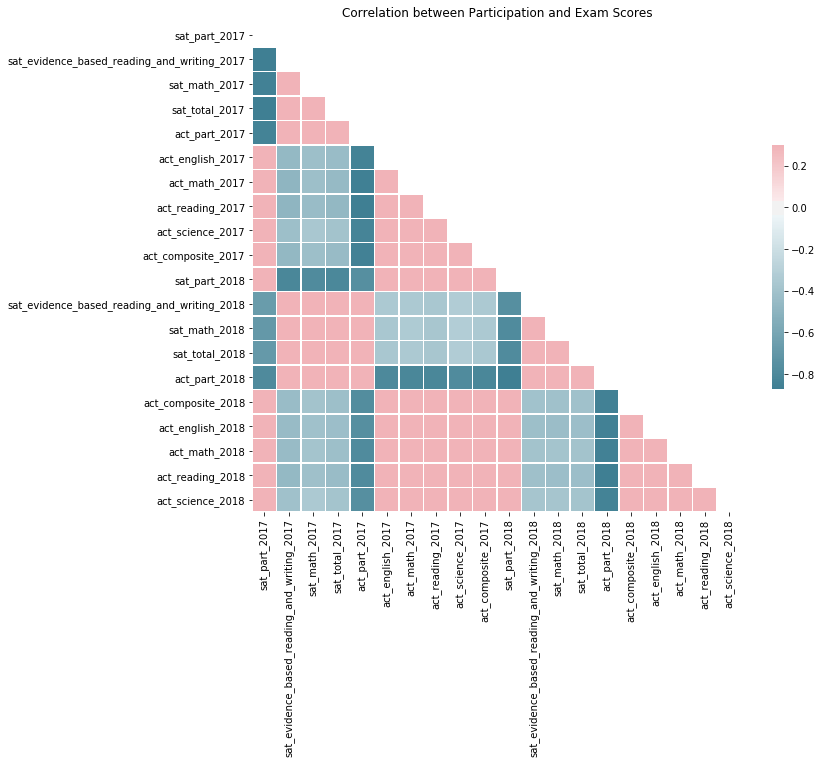

In [49]:
# Compute the correlation matrix
corr = final.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Correlation between Participation and Exam Scores")

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [50]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 7.5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('Number of states') # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

<h3> Participation rates for SAT 2017 and 2018 <h3>

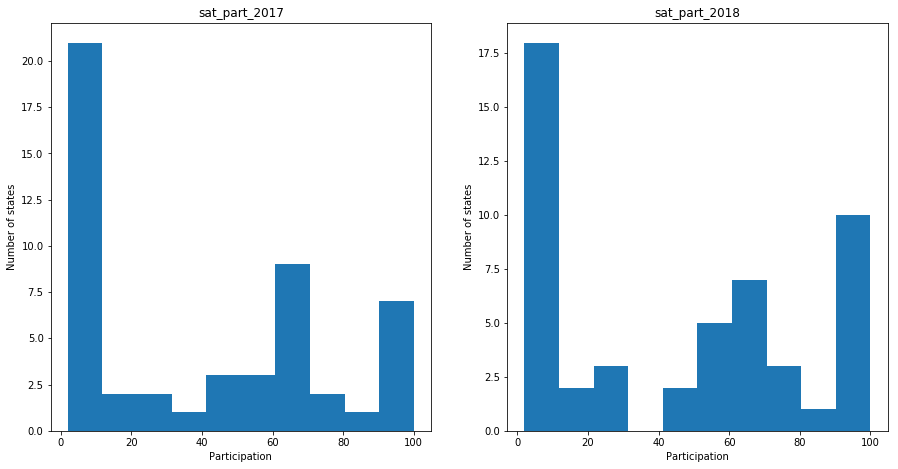

In [51]:
subplot_histograms(final, ['sat_part_2017','sat_part_2018'],['sat_part_2017','sat_part_2018'],['Participation','Participation'])

<h3> Participation rates for ACT 2017 and 2018 <h3>

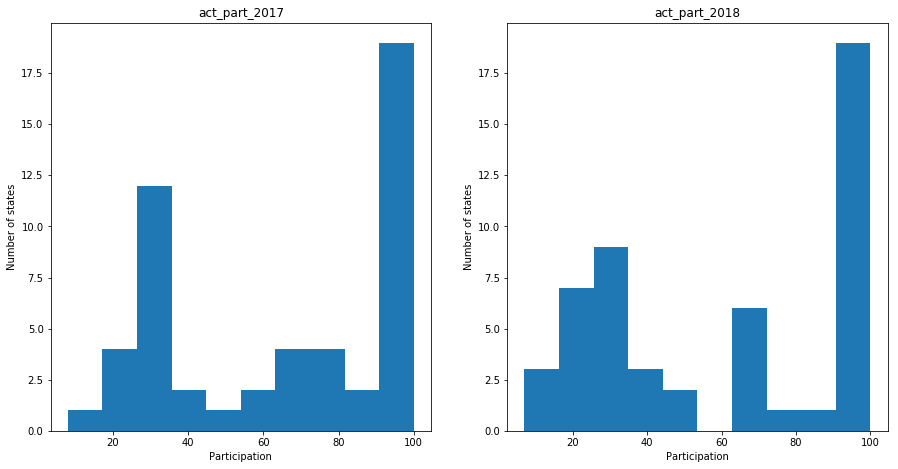

In [52]:
subplot_histograms(final, ['act_part_2017','act_part_2018'],['act_part_2017','act_part_2018'],['Participation','Participation'])

<h3> Math Scores for SAT 2017 and 2018 <h3>

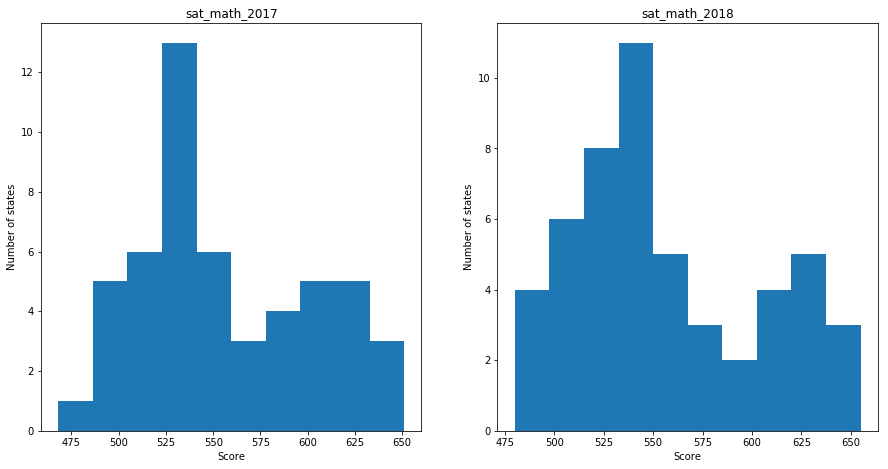

In [53]:
subplot_histograms(final, ['sat_math_2017','sat_math_2018'],['sat_math_2017','sat_math_2018'],['Score','Score'])

<h3> Math Scores for ACT 2017 and 2018 <h3>

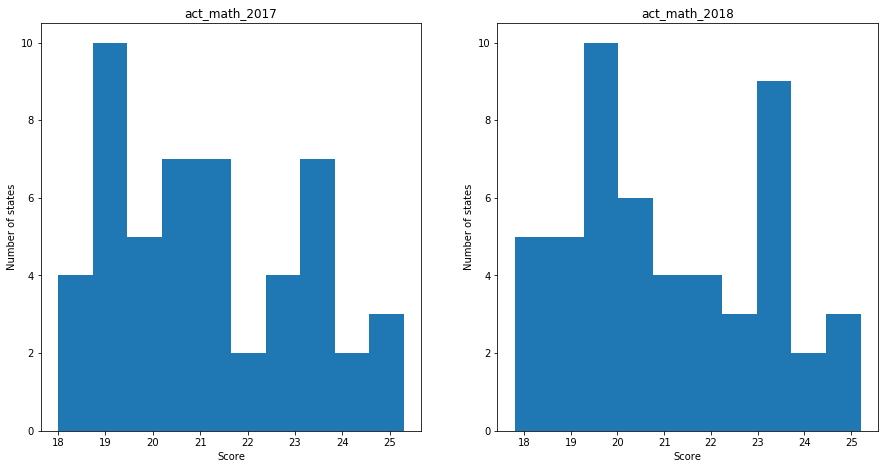

In [54]:
subplot_histograms(final, ['act_math_2017','act_math_2018'],['act_math_2017','act_math_2018'],['Score','Score'])

<h3> Reading/Verbal scores for SAT 2017 and 2018 <h3>

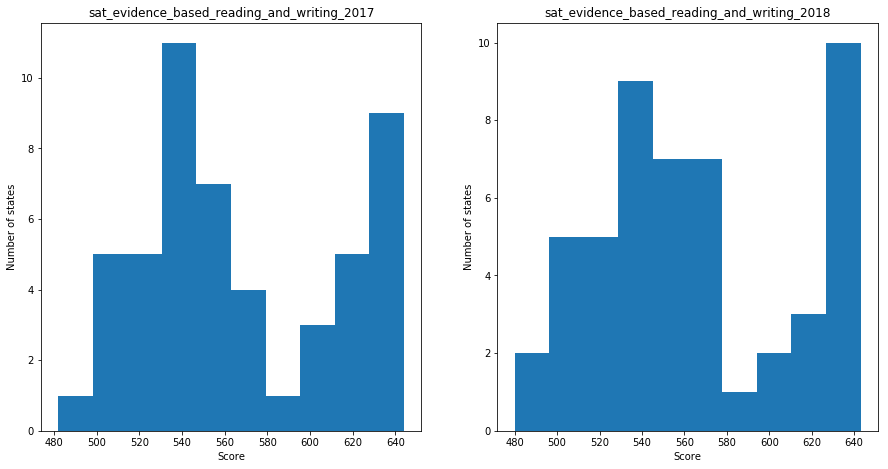

In [55]:
subplot_histograms(final, ['sat_evidence_based_reading_and_writing_2017','sat_evidence_based_reading_and_writing_2018'],['sat_evidence_based_reading_and_writing_2017','sat_evidence_based_reading_and_writing_2018'],['Score','Score'])

<h3> Reading/Verbal scores for ACT 2017 and 2018 <h3>

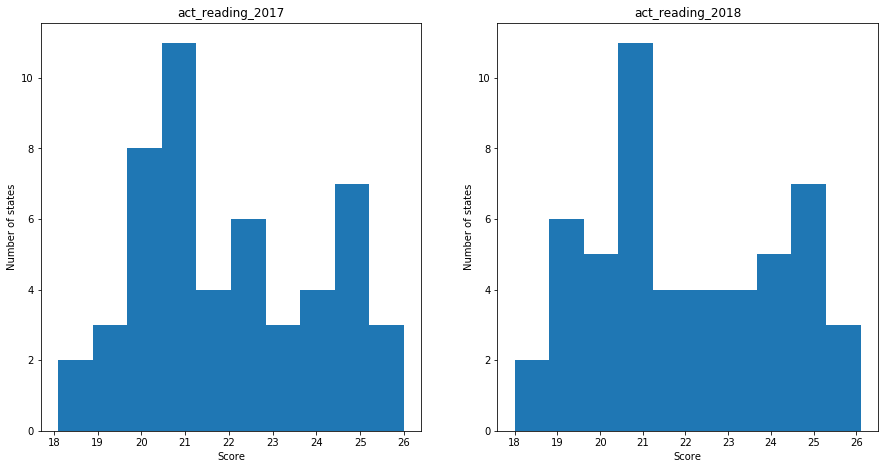

In [56]:
subplot_histograms(final, ['act_reading_2017','act_reading_2018'],['act_reading_2017','act_reading_2018'],['Score','Score'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [57]:
def scatter_plotter(dataframe, list_of_columns, list_of_x_y_labels, title):
    plt.figure(figsize=(15,7.5))
    plt.scatter(dataframe[list_of_columns[0]],dataframe[list_of_columns[1]],c=['red'])
    plt.plot(np.unique(dataframe[list_of_columns[0]]), np.poly1d(np.polyfit(dataframe[list_of_columns[0]], dataframe[list_of_columns[1]], 1))(np.unique(dataframe[list_of_columns[0]])))
    plt.xlabel(list_of_x_y_labels[0])
    plt.ylabel(list_of_x_y_labels[1])
    plt.title(title)

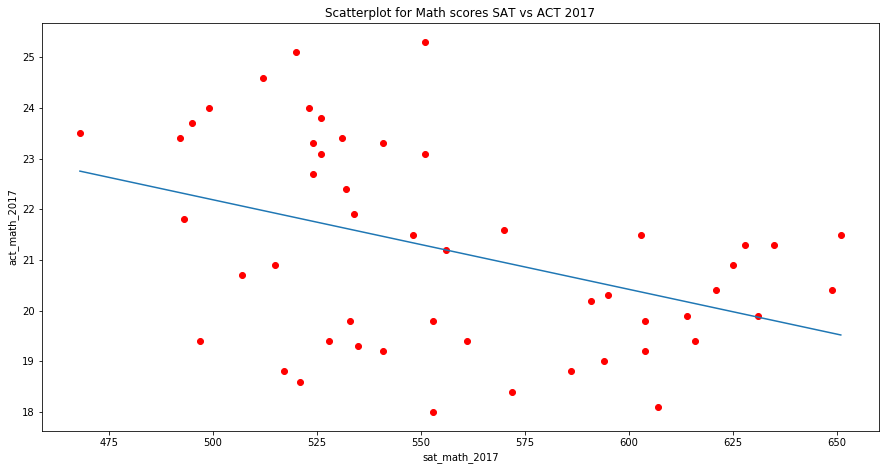

In [58]:
scatter_plotter(final,['sat_math_2017','act_math_2017'],['sat_math_2017','act_math_2017'],'Scatterplot for Math scores SAT vs ACT 2017')

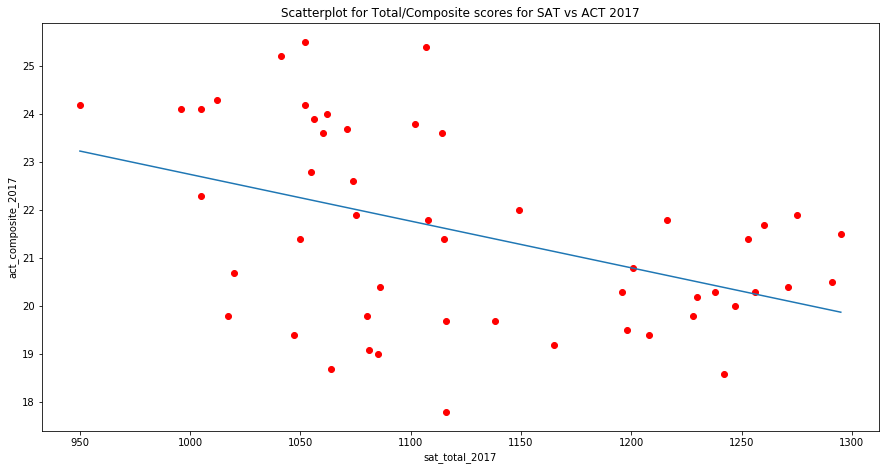

In [59]:
scatter_plotter(final,['sat_total_2017','act_composite_2017'],['sat_total_2017','act_composite_2017'],'Scatterplot for Total/Composite scores for SAT vs ACT 2017')

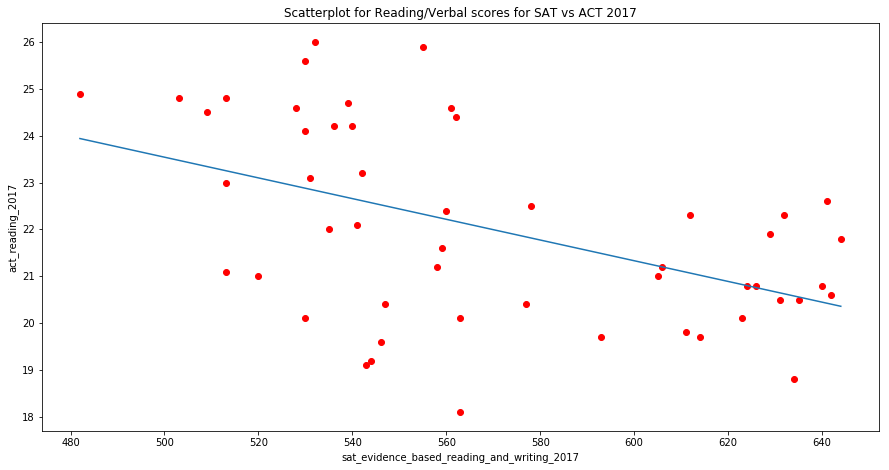

In [60]:
scatter_plotter(final,['sat_evidence_based_reading_and_writing_2017','act_reading_2017'],['sat_evidence_based_reading_and_writing_2017','act_reading_2017'],'Scatterplot for Reading/Verbal scores for SAT vs ACT 2017')

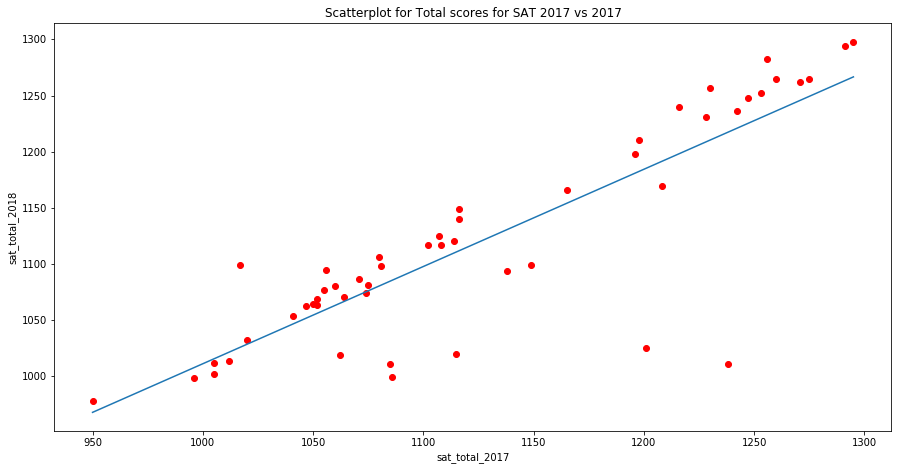

In [61]:
scatter_plotter(final,['sat_total_2017','sat_total_2018'],['sat_total_2017','sat_total_2018'],'Scatterplot for Total scores for SAT 2017 vs 2017')

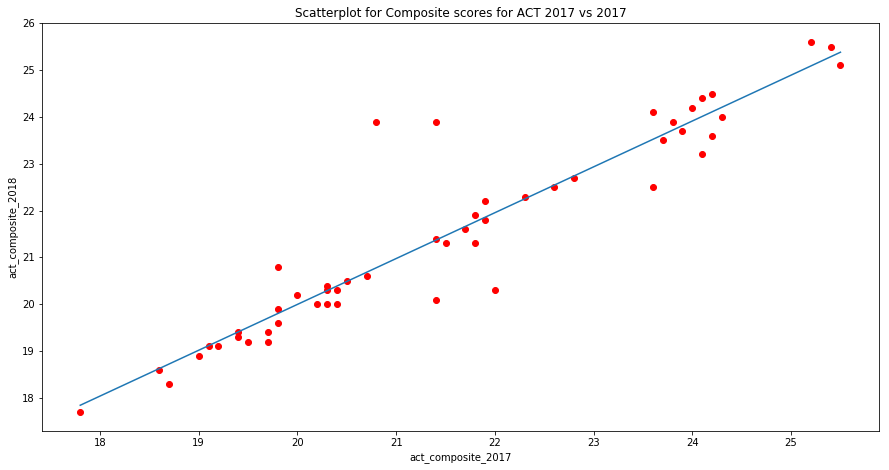

In [62]:
scatter_plotter(final,['act_composite_2017','act_composite_2018'],['act_composite_2017','act_composite_2018'],'Scatterplot for Composite scores for ACT 2017 vs 2017')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [63]:
def box_plotter(dataframe, list_of_columns, list_of_axes, title):
    table = final[list_of_columns]
    plt.figure(figsize=(15,7.5))
    sns.boxplot(data=table)
    plt.xlabel(list_of_axes[0])
    plt.ylabel(list_of_axes[1])
    plt.title(title)

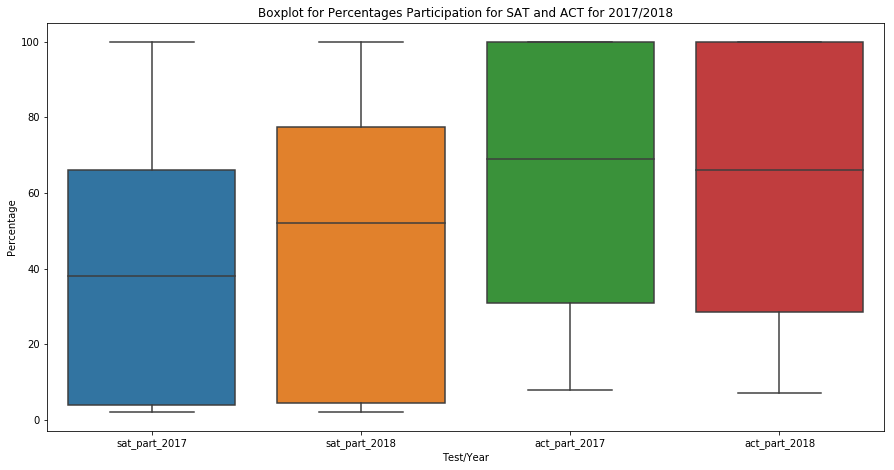

In [64]:
box_plotter(final,['sat_part_2017','sat_part_2018','act_part_2017','act_part_2018'],['Test/Year','Percentage'],"Boxplot for Percentages Participation for SAT and ACT for 2017/2018")

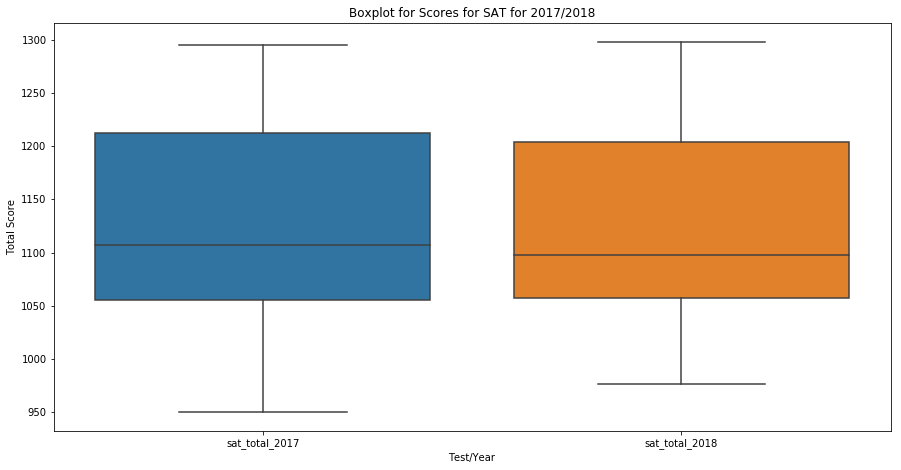

In [65]:
box_plotter(final, ['sat_total_2017','sat_total_2018'], ['Test/Year', "Total Score"], "Boxplot for Scores for SAT for 2017/2018" )

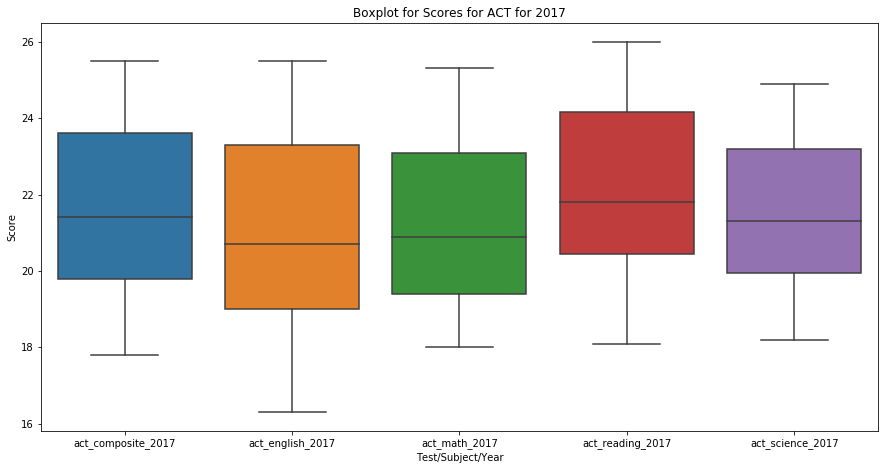

In [66]:
box_plotter(final, ['act_composite_2017',
                    'act_english_2017',
                    'act_math_2017',
                    'act_reading_2017',
                    'act_science_2017'], ['Test/Subject/Year','Score'], "Boxplot for Scores for ACT for 2017")

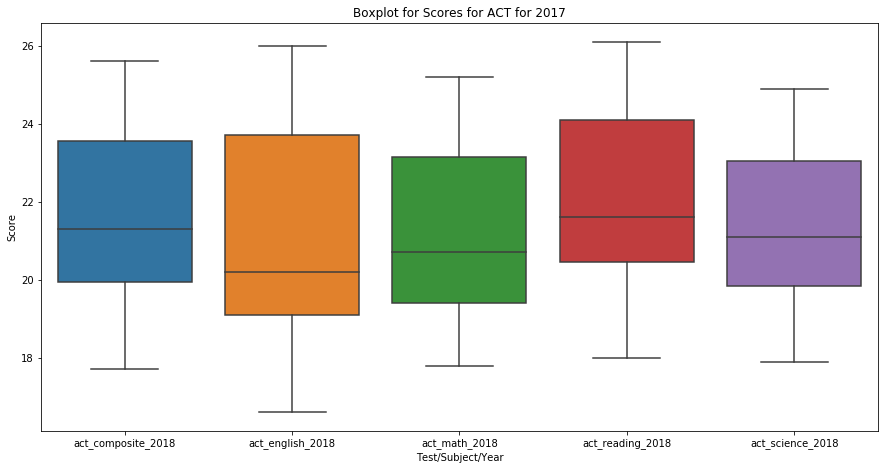

In [67]:
box_plotter(final, ['act_composite_2018',
                    'act_english_2018',
                    'act_math_2018',
                    'act_reading_2018',
                    'act_science_2018'], ['Test/Subject/Year','Score'], "Boxplot for Scores for ACT for 2017")

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

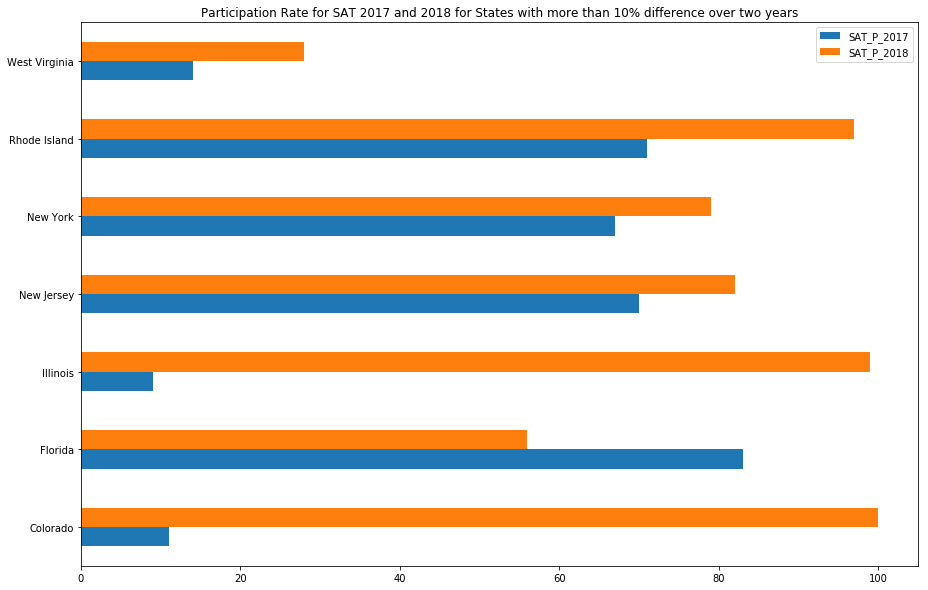

In [68]:
# Plotting both participation rates for states that have more than 10% change for SAT 2017 and SAT 2018 

sat_df = pd.DataFrame({'SAT_P_2017': [x for x in final['sat_part_2017']],
                   'SAT_P_2018': [x for x in final['sat_part_2018']]}, index = [x for x in final['state']])

filtered_sat_df = sat_df[abs(sat_df['SAT_P_2017'] - sat_df['SAT_P_2018']) > 10]

filtered_sat_df.plot(kind='barh',figsize=(15,10), title="Participation Rate for SAT 2017 and 2018 for States with more than 10% difference over two years")

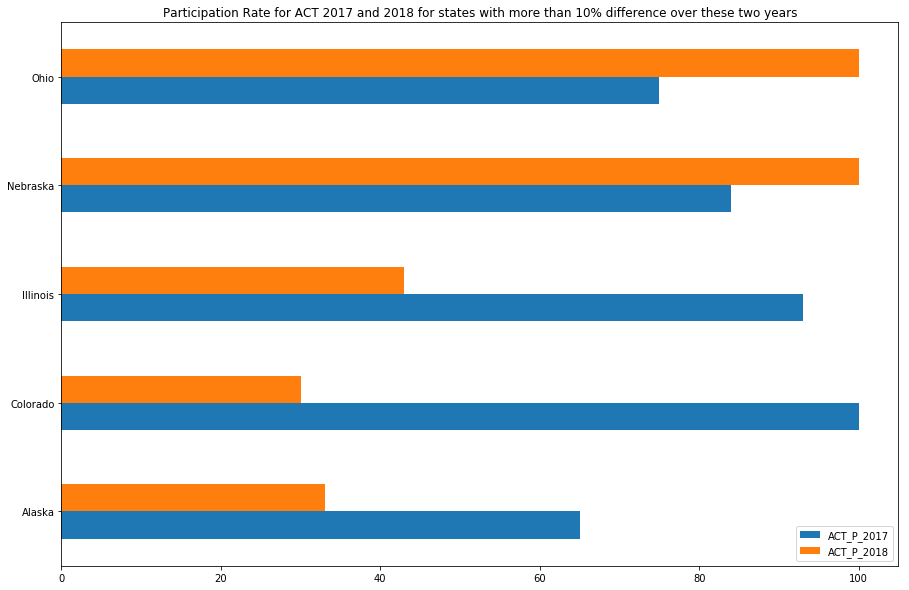

In [69]:
# Plotting both participation rates for states that have more than 10% change for ACT 2017 and ACT 2018 

act_df = pd.DataFrame({'ACT_P_2017': [x for x in final['act_part_2017']],
                   'ACT_P_2018': [x for x in final['act_part_2018']]}, index = [x for x in final['state']])

filtered_act_df = act_df[abs(act_df['ACT_P_2017'] - act_df['ACT_P_2018']) > 10]

filtered_act_df.plot(kind='barh',figsize=(15,10), title="Participation Rate for ACT 2017 and 2018 for states with more than 10% difference over these two years")

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [70]:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sat_part_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_evidence_based_reading_and_writing_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.921569,47.094307,468.0,523.50,548.0,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_part_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


Answer:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: Yes, because we have more than 30 samples. Based on Central Limit Theorem, we have 50 samples which is more than 30 samples needed to assumed a normal distribution. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: No, all the data points that we have collected are aggregation, and aggregation cannot tell us much as it is just averages of all the different states. We cannot look into outliers for example and it only gives us a rough picture.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No. SAT and ACT have different math syllabus and they have a different examination format.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [71]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

For both Illinois and Colorado, both states have shown great improvement of SAT participation rates from 2017 compared to 2018. Both of the states, Colorado and Illinois have partnered with the College Board to administer the SAT as the state’s accountability exam and every junior will now take a new four hour exam thus this explained the huge jump in participation rates for the SAT from 2017 to 2018. It was made compulsory for students to take the SAT to qualify for college. 

Source: https://www.testive.com/colorado-sat-change-2017/ <br>
Source: https://www.testive.com/illinois/ <br>

However, this meant that ACT was being replaced by the SAT and the participation rates for ACT for these two years and these two states have also dropped drastically.

Idaho, Delaware, Maine has high SAT participation rate for it's SAT participation rates over both years as the cost of taking SAT is covered by the state thus students are more inclined to take the SAT exam instead of the ACT exam thus participation rates remain high for these states over 2017 to 2018.

The College Board launched in an effort to increase access for students who historically take the test at lower rates, including low-income and first-generation students, students who work on the weekends, have family obligations or have trouble accessing transportation to testing centers.

Source: https://www.usnews.com/news/education-news/articles/2019-09-24/more-students-are-taking-the-sat-than-ever-before

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

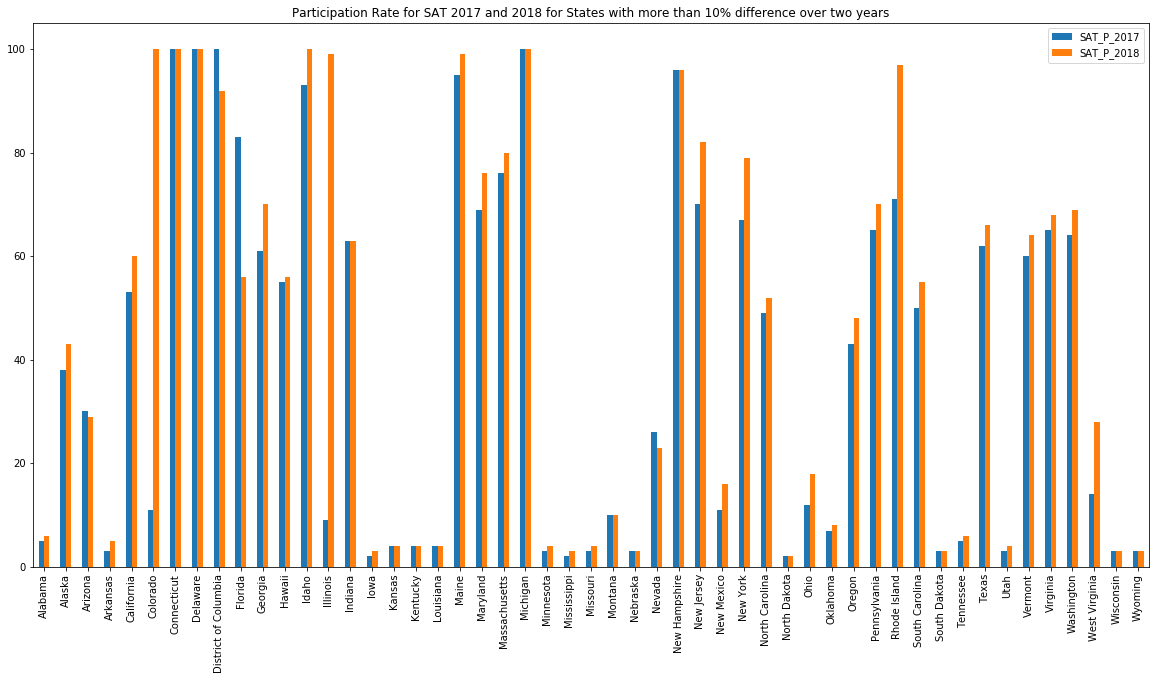

In [72]:
sat_df = pd.DataFrame({'SAT_P_2017': [x for x in final['sat_part_2017']],
                   'SAT_P_2018': [x for x in final['sat_part_2018']]}, index = [x for x in final['state']])

sat_df.plot(kind='bar',figsize=(20,10), title="Participation Rate for SAT 2017 and 2018 for States with more than 10% difference over two years")

Ohio has a low SAT participation rate for both the 2017 SAT and 2018 SAT. However, it has the 7th largest state in the U.S. Based on research, it is more cost efficient to take the SAT than the ACT and also, more and more people are taking SAT examinations rather than ACT and the College Board has also been actively helping poorer students to take the SATs at a lower cost. The number of SAT exam takers have overtaken ACT over these years with ACT holding the top spot since 2012.

Source: https://www.usnews.com/education/best-colleges/articles/act-vs-sat-how-to-decide-which-test-to-take <br>
Source: https://www.worldatlas.com/articles/us-states-by-population.html<br>
Source: https://dailynorthwestern.com/2018/11/12/campus/college-board-sat-overtakes-act-for-highest-number-of-test-takers/<br>